## 1 plot the close price

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
data = pd.read_csv('price.csv')
data.head()

,Unnamed: 0,open,high,low,close,volume,date
0,0,226.5,226.5,219.0,219.5,32900482,2019/1/2
1,1,214.0,218.0,214.0,215.5,34615620,2019/1/3
2,2,211.5,211.5,206.5,208.0,67043521,2019/1/4
3,3,212.0,214.0,211.0,213.0,35695176,2019/1/7
4,4,212.0,212.5,210.0,211.0,23794481,2019/1/8


In [31]:
data.index = pd.to_datetime(data.date)
data.head()

,Unnamed: 0,open,high,low,close,volume,date
date,,,,,,,
2019-01-02,0,226.5,226.5,219.0,219.5,32900482,2019/1/2
2019-01-03,1,214.0,218.0,214.0,215.5,34615620,2019/1/3
2019-01-04,2,211.5,211.5,206.5,208.0,67043521,2019/1/4
2019-01-07,3,212.0,214.0,211.0,213.0,35695176,2019/1/7
2019-01-08,4,212.0,212.5,210.0,211.0,23794481,2019/1/8


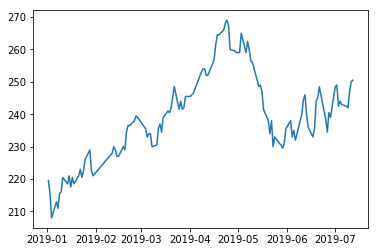

In [32]:
plt.plot(data.close)

Text(0.5, 1.0, 'Stock_2330')

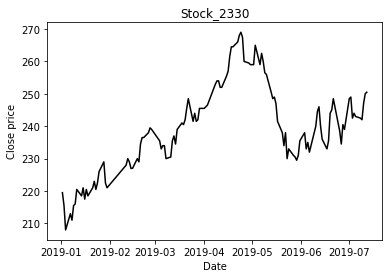

In [33]:
plt.plot(data.close,color='black')
plt.ylabel('Close price')
plt.xlabel('Date')
plt.title('Stock_2330')

## 2 Plot the SMA and price

In [34]:
import talib
sma5 = talib.SMA(data.close,5)
sma5.head(7)

date
2019-01-02      NaN
2019-01-03      NaN
2019-01-04      NaN
2019-01-07      NaN
2019-01-08    213.4
2019-01-09    212.6
2019-01-10    212.7
dtype: float64

Text(0.5, 1.0, 'Stock_2330')

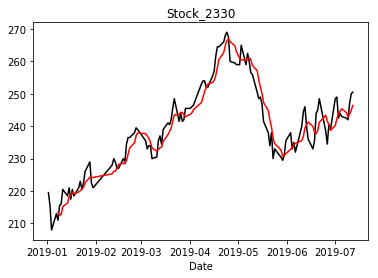

In [35]:
plt.plot(data.close,color='black')
plt.plot(sma5,'r')
plt.xlabel('Date')
plt.title('Stock_2330')

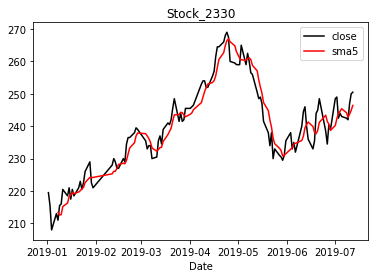

In [36]:
plt.plot(data.close,color='black',label='close')
plt.plot(sma5,'r',label='sma5')
plt.xlabel('Date')
plt.title('Stock_2330')
plt.legend()

## 3 Plot the volume

<BarContainer object of 125 artists>

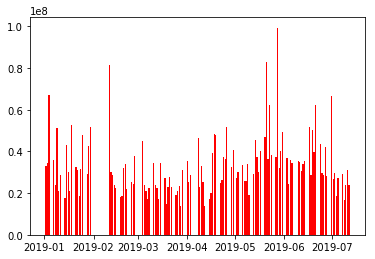

In [37]:
plt.bar(data.volume.index,data.volume,color='red')

Text(0.5, 1.0, 'Stock_2330')

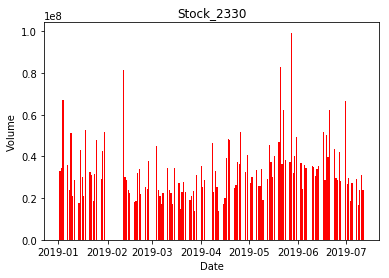

In [38]:
plt.bar(data.volume.index,data.volume,color='red')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title('Stock_2330')

## 4  Plot the price and volume

Text(0.5, 0, 'Date')

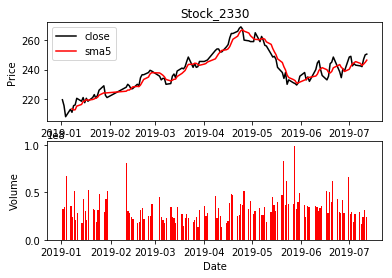

In [39]:
plt.subplot(211)
plt.plot(data.close,color='black',label='close')
plt.plot(sma5,'r',label='sma5')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Stock_2330')
plt.legend()

plt.subplot(212)
plt.bar(data.volume.index,data.volume,color='red')
plt.ylabel('Volume')
plt.xlabel('Date')

## 5. Plot the candle

In [41]:
from mpl_finance import  candlestick_ohlc

In [ ]:
def candlePlot(seriesData,title='a'):   
	#設定日期格式
    Date=[date2num(date) for date in seriesData.index]
    seriesData.loc[:,'Date']=Date

	#將DataFrame數據轉換成List類型
    listData=[]
    for i in range(len(seriesData)):
        a=[seriesData.Date[i],\
        seriesData.Open[i],seriesData.High[i],\
        seriesData.Low[i],seriesData.Close[i]]
        listData.append(a)

	#設定繪圖相關參數
    ax = plt.subplot()
    mondays = WeekdayLocator(MONDAY)
    #日期格式為‘15-Mar-09’形式
    weekFormatter = DateFormatter('%y %b %d')
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(DayLocator())
    ax.xaxis.set_major_formatter(weekFormatter)

	#調用candlestick_ohlc函數
    candlestick_ohlc(ax,listData, width=0.7,\
                     colorup='r',colordown='g')
    ax.set_title(title) #設定標題
    #設定x軸日期顯示角度
    plt.setp(plt.gca().get_xticklabels(), \
    rotation=50,horizontalalignment='center')
    return(plt.show())

In [40]:
data.head()

,Unnamed: 0,open,high,low,close,volume,date
date,,,,,,,
2019-01-02,0,226.5,226.5,219.0,219.5,32900482,2019/1/2
2019-01-03,1,214.0,218.0,214.0,215.5,34615620,2019/1/3
2019-01-04,2,211.5,211.5,206.5,208.0,67043521,2019/1/4
2019-01-07,3,212.0,214.0,211.0,213.0,35695176,2019/1/7
2019-01-08,4,212.0,212.5,210.0,211.0,23794481,2019/1/8


In [48]:
data.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'date'], dtype='object')

In [49]:
data2 = data[['date','open', 'high', 'low', 'close']]
data2.head()

,date,open,high,low,close
date,,,,,
2019-01-02,2019/1/2,226.5,226.5,219.0,219.5
2019-01-03,2019/1/3,214.0,218.0,214.0,215.5
2019-01-04,2019/1/4,211.5,211.5,206.5,208.0
2019-01-07,2019/1/7,212.0,214.0,211.0,213.0
2019-01-08,2019/1/8,212.0,212.5,210.0,211.0


In [50]:
data2.columns = ['Date','Open','High','Low','Close']

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


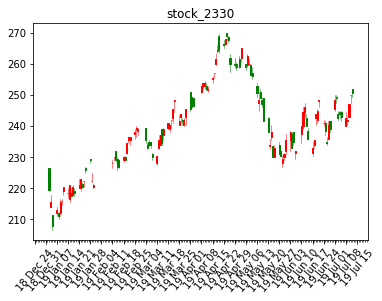

In [51]:
from candle import candlePlot
candlePlot(data2,title='stock_2330')

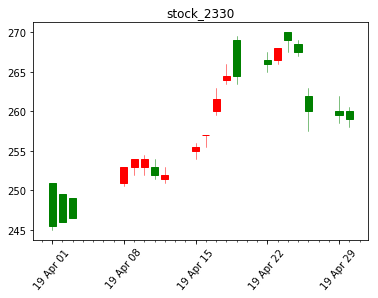

In [52]:
candlePlot(data2['2019-04'],title='stock_2330')